In [1]:
import numpy as np
import numpy.linalg as la

import scipy.optimize as sopt
import sympy as scm
import matplotlib.pyplot as pt
from mpl_toolkits.mplot3d import axes3d


In [37]:
def grad(f):
    df = []
    df.append(scm.diff(f, x))
    df.append(scm.diff(f, y))
    arr = np.array(df)
    return arr

x, y = scm.symbols('x y')
fun = x**2 + y**2

dff = grad(fun)
def f(x):
#     return fun.subs([(x, X[0]), (y, X[1])])
    return x[0]**2 + x[1]**2

def df(x):
#     return np.array([scm.diff(f, x).subs([(x, X[0]), (y, X[1])]), scm.diff(f, y).subs([(x, X[0]), (y, X[1])])])
    return np.array([2*x[0], 2*x[1]])

str

/tmp/ipykernel_10040/157005317.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


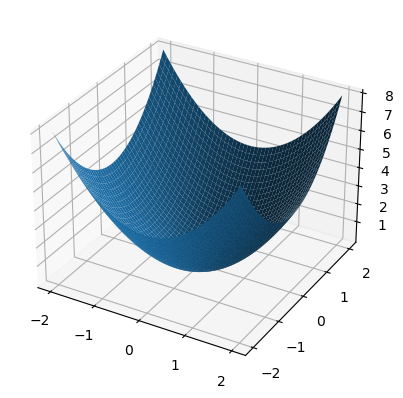

In [31]:
fig = pt.figure()
ax = fig.gca(projection="3d")

xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]
fmesh = f(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh)


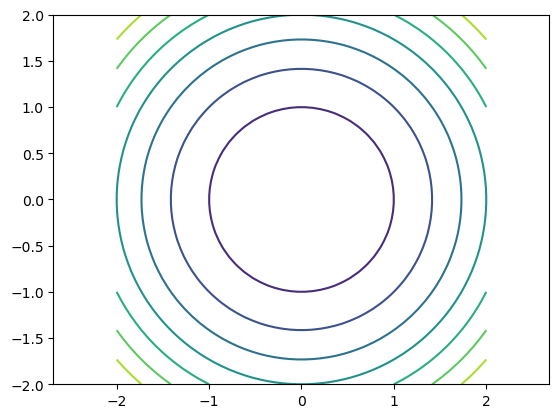

In [32]:
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh)

In [33]:
guesses = [np.array([2, 3])]

In [34]:



def f1d(alpha):
    return f(x + alpha*s)
mma = 0
while mma < 15:
    x = guesses[-1]
    s = -df(x)

    alpha_opt = sopt.golden(f1d)
#     print(alpha_opt)
    next_guess = x + alpha_opt * s
    guesses.append(next_guess)

#     print(next_guess)
    mma += 1

for word in guesses:
    print(word)

[2 3]
[-5.24555066e-10 -7.86832821e-10]
[1.37579058e-19 2.06368535e-19]
[-3.60838864e-29 -5.41258296e-29]
[9.46399428e-39 1.41959942e-38]
[-2.48219319e-48 -3.72328914e-48]
[6.51023417e-58 9.76535126e-58]
[-1.70748791e-67 -2.56123186e-67]
[4.47835863e-77 6.71753465e-77]
[-1.17457271e-86 -1.76185830e-86]
[3.08064034e-96 4.62095872e-96]
[-8.07982808e-106 -1.21197338e-105]
[2.11915781e-115 3.17873381e-115]
[-5.55807280e-125 -8.33710469e-125]
[1.45775812e-134 2.18663508e-134]
[-3.82337261e-144 -5.73505159e-144]


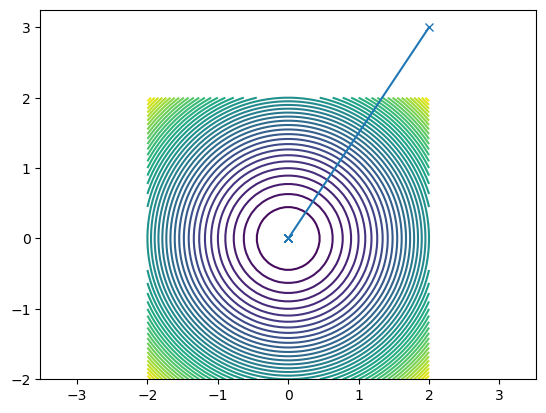

In [28]:
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh, 50)
it_array = np.array(guesses)
pt.plot(it_array.T[0], it_array.T[1], "x-")